Dalton Nickerson<br>
Parallel Programming<br>
May 3, 2017<br>
<h1>Timing Plots for CUDA Array Sum Reduction:</h1>
The following code was used to generate the plot from the input text file <em>"timing.txt"</em>.<br>
The data was generated with various problem sizes in doubling length increments with each size being tested 50 times for a more accurate average time measurement.
We begin by opening our data file and reading its contents.

In [1]:
plotLabels = ['Size', 'AvgCPUTime', 'AvgGPUTime']
labels = []
data = {}
with open('timing.txt','r') as f:
    for line in f:
        line = line.strip()
        params = line.split('\t')
        if len(labels)<1:
            labels = plotLabels
            for label in labels:
                data[label] = []
        else:
            for i in range(min(len(params),len(plotLabels))):
                if labels[i] in plotLabels:
                    data[labels[i]].append(float(params[i]))    
                else:
                    data[labels[i]].append(params[i])
print("Data read successfully.")

Data read successfully.


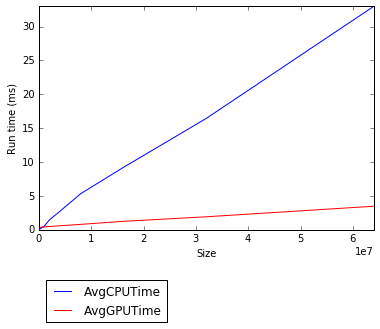

In [5]:
%matplotlib inline

import matplotlib
import numpy as np
import matplotlib.pyplot as plt

plt.plot(data[plotLabels[0]],data[plotLabels[1]],'b-', label=plotLabels[1])
plt.plot(data[plotLabels[0]],data[plotLabels[2]],'r-', label=plotLabels[2])
plt.xlabel(plotLabels[0])
plt.ylabel("Run time (ms)")
plt.xlim([0,data[plotLabels[0]][-1]])
plt.ylim([0,max(max(data[plotLabels[1]]),max(data[plotLabels[2]]))])
lgd = plt.legend(bbox_to_anchor=(0.40,-0.20))
plt.savefig("timingPlot.png",bbox_extra_artists=(lgd,),bbox_inches="tight")
plt.show()